In [1]:
import pandas as pd
customer_data=pd.read_csv('data.csv')
customer_data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


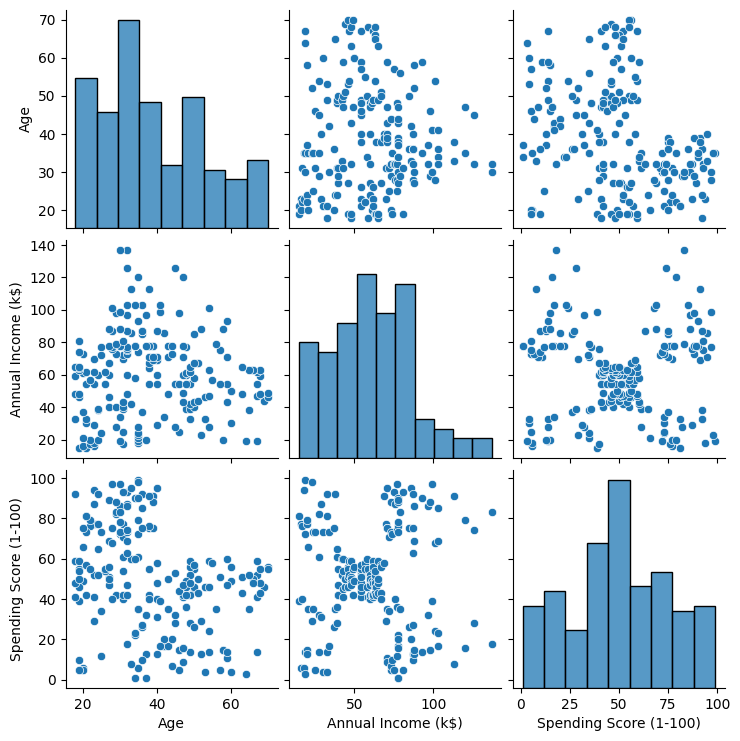

In [ ]:
import seaborn as sns
customer_data=customer_data.drop('CustomerID',axis=1)
sns.pairplot(customer_data)

In [ ]:
selected_cols = ['Annual Income (k$)', 'Spending Score (1-100)']
customer_data = customer_data[selected_cols]


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # creating the scaler
scaled_data = ss.fit_transform(customer_data)
scaled_customer_data = pd.DataFrame(columns=selected_cols, data=scaled_data)
scaled_customer_data.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nn = NearestNeighbors(n_neighbors=4) # minimum points -1
nbrs = nn.fit(scaled_customer_data)
distances, indices = nbrs.kneighbors(scaled_customer_data)
distances, indices

(array([[0.        , 0.08564307, 0.27669913, 0.37699224],
        [0.        , 0.15990848, 0.20603662, 0.20857963],
        [0.        , 0.07633886, 0.16332841, 0.31170347],
        [0.        , 0.0544428 , 0.15267772, 0.15990848],
        [0.        , 0.08564307, 0.24695814, 0.33025172],
        [0.        , 0.0544428 , 0.12091014, 0.16332841],
        [0.        , 0.07633886, 0.12255989, 0.26999162],
        [0.        , 0.19782504, 0.24604156, 0.50013409],
        [0.        , 0.12255989, 0.16332841, 0.24182028],
        [0.        , 0.17303595, 0.19475561, 0.19782504],
        [0.        , 0.0544428 , 0.0544428 , 0.31290921],
        [0.        , 0.15753602, 0.19782504, 0.59950147],
        [0.        , 0.0544428 , 0.07764312, 0.30781334],
        [0.        , 0.07764312, 0.12091014, 0.15267772],
        [0.        , 0.0544428 , 0.07764312, 0.28226971],
        [0.        , 0.07764312, 0.16332841, 0.17128613],
        [0.        , 0.11450829, 0.24511979, 0.24695814],
        [0.   

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1] # Choosing only the smallest distances

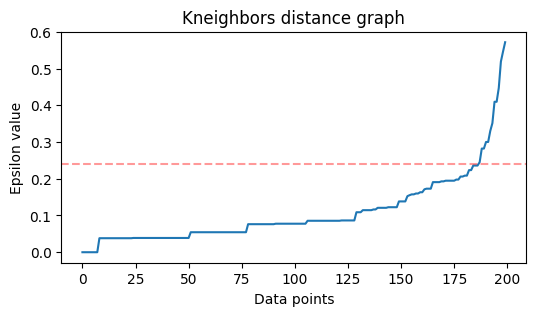

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.plot(distances)
plt.axhline(y=0.24, color='r', linestyle='--', alpha=0.4) # elbow line
plt.title('Kneighbors distance graph')
plt.xlabel('Data points')
plt.ylabel('Epsilon value')
plt.show();

In [ ]:
from sklearn.cluster import DBSCAN

# min_samples == minimum points ≥ dataset_dimensions + 1
dbs = DBSCAN(eps=0.24, min_samples=5)
dbs.fit(scaled_customer_data)

DBSCAN(eps=0.24)

In [ ]:
labels = dbs.labels_

scaled_customer_data['labels'] = labels
scaled_customer_data.head()

,Annual Income (k$),Spending Score (1-100),labels
0,-1.738999,-0.434801,-1
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,-1
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,-1


In [ ]:
labels_list = list(scaled_customer_data['labels'])
n_noise = labels_list.count(-1)
print("Number of noise points:", n_noise)

Number of noise points: 62


In [ ]:
total_labels = np.unique(labels)

n_labels = 0
for n in total_labels:
    if n != -1:
        n_labels += 1
print("Number of clusters:", n_labels)

Number of clusters: 6


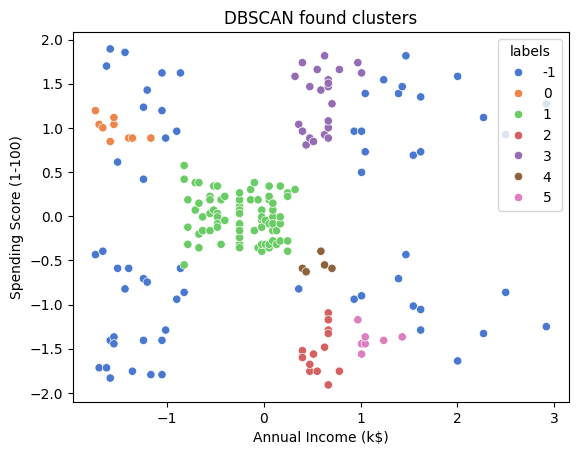

In [ ]:
sns.scatterplot(data=scaled_customer_data, 
                x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='labels', palette='muted').set_title('DBSCAN found clusters');

In [ ]:
from sklearn.metrics import silhouette_score

s_score = silhouette_score(scaled_customer_data, labels)
print(f"Silhouette coefficient: {s_score:.3f}")

Silhouette coefficient: 0.506


In [ ]:
from sklearn.metrics import davies_bouldin_score
ari = davies_bouldin_score(scaled_customer_data, labels) 
print(ari) 


0.7297959168706807
